# Machine Learning

*Лектор: Екатерина Лобачева*

*Факультет экономических наук НИУ ВШЭ, 2017-18 учебный год*

[Страница курса](http://wiki.cs.hse.ru/Машинное_обучение_(факультет_экономических_наук%29)

## Домашнее задание №1
Задание основано на материалах курса [Data analysis (Software Engineering)](http://wiki.cs.hse.ru/Data_analysis_(Software_Engineering%29) (ФКН НИУ ВШЭ).

Вам необходимо анализировать набор данных [adult.data](http://archive.ics.uci.edu/ml/datasets/Adult) (источник: UCI Machine Learning Repository) с помощью Python, pandas, numpy, scipy.

Чтобы выполнить работу, скачайте настоящий ipynb-файл, откройте его в *Jupyter Notebook*, впишите решения в оставленные для этого ячейки (при необходимости можно добавлять новые ячейки), приводя полный работающий код, а также все необходимые пояснения и ответы (для этого нужно использовать markdown-ячейки). Вы можете вставлять формулы с помощью TeX-разметки в markdown-ячейки. После выполнения работы необходимо вытащить ipynb-файл из Jupyter (например, с помощью *File → Download as… → IPython Notebook*).

**Подсказка.** Файл [adult.data](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data) является CSV-файлом, но в нём отсутствуют имена переменных — они (вместе с описаниями) приводятся в отдельном файле [adult.names](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). При загрузке датафрейма с помощью `pd.read_csv` используйте параметры `header=None` (чтобы первая строка не воспринималась как строка с именами переменных) и `names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"]`. Чтобы убрать лишние пробелы после запятых, которые есть в файле, следует добавить опцию `skipinitialspace=True`.

### Вопрос 1
Сколько мужчин и женщин в выборке?

In [49]:
import pandas as pd
import numpy as np

pass_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',header=None, sep=',',skipinitialspace=True, names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"])
print(pass_data)
pass_data['sex'].value_counts()


       age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      Married-civ-spouse    Exec-manag

Male      21790
Female    10771
Name: sex, dtype: int64

### Вопрос 2
Каков средний возраст мужчин?


In [54]:
value = pass_data[pass_data['sex']=='Male']['age'].mean()
print(value)

39.43354749885268


### Вопрос 3
Какова доля граждан США?

In [86]:
value = (len(pass_data[pass_data['native-country']=='United-States']))/(len(pass_data))
print(value)

0.895857006848684


### Вопрос 4
Нарисовать распределение уровня образования в виде столбчатой диаграммы (bar plot).

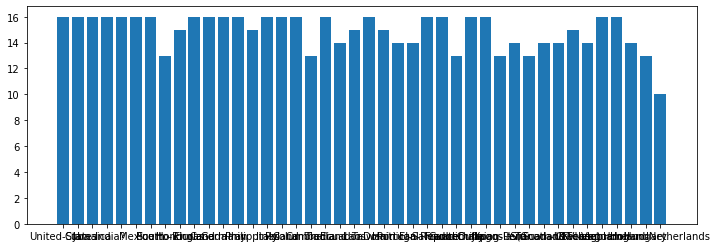

In [100]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

x = pass_data['native-country']
y = pass_data['education-num']

fig, ax = plt.subplots()

ax.bar(x, y)

fig.set_figwidth(12)
fig.set_figheight(4)

plt.show()

### Вопрос 5
Найти среднее и стандартное отклонение переменной "final weight" (fnlwgt) для разведённых людей?

In [66]:
x = pass_data[['fnlwgt']].mean()
print(x)
y= pass_data[['fnlwgt']].std()
print(y) 

fnlwgt    189778.366512
dtype: float64
fnlwgt    105549.977697
dtype: float64


### Вопрос 6
Правда ли, что люди, зарабатывающие более 50 тыс. в основном имеют высшее образование?

In [99]:
data = pass_data[pass_data['50K'] == '>50K']
education_data = data[(data['education'] == 'Bachelors')|(data['education'] == 'Masters')|(data['education'] == 'Some-college')|(data['education'] == 'HS-grad')|(data['education'] == 'Assoc-acdm')|(data['education'] == 'Assoc-voc')|(data['education'] == 'Doctorate')]
check = len(education_data['education']) / len(data['50K'])
print(check > 0.5)


True


### Вопрос 7
Каков максимальный возраст мужчин и женщин каждой расы?

In [68]:
female=pass_data[pass_data['sex']=='Female']
male=pass_data[pass_data['sex']=='Male']
print(female.groupby(['race'])['age'].max())
print(male.groupby(['race'])['age'].max())

race
Amer-Indian-Eskimo    80
Asian-Pac-Islander    75
Black                 90
Other                 74
White                 90
Name: age, dtype: int64
race
Amer-Indian-Eskimo    82
Asian-Pac-Islander    90
Black                 90
Other                 77
White                 90
Name: age, dtype: int64


### Вопрос 8
Люди из каких стран работают как фермеры/рыбаки?

In [56]:
df = pass_data[pass_data['occupation']=='Farming-fishing']
df = df.drop_duplicates('native-country')
print(df['native-country'])

16       United-States
255           Cambodia
500             Poland
771          Guatemala
861             Mexico
2353           England
3532                 ?
6006       Philippines
6559             Italy
8551       Puerto-Rico
11271          Vietnam
12621          Germany
15177            Japan
16486           Canada
20549       Yugoslavia
21145             Cuba
22391         Portugal
25761      El-Salvador
25943             Hong
28654          Ireland
29466           France
Name: native-country, dtype: object


### Вопрос 9
Рассмотрим два отношения 1) количество мужчин-бакалавров к количеству мужчин-магистров и 2) количество женщин-бакалавров к количеству женщин-магистров. Какое отношение больше?


In [110]:
male_bach = len(pass_data[(pass_data['sex']=="Male")&(pass_data['education']=='Bachelors')])
male_mag = len(pass_data[(pass_data['sex']=="Male")&(pass_data['education']=='Masters')])
male_ratio = male_bach/male_mag
female_bach = len(pass_data[(pass_data['sex']=="Female")&(pass_data['education']=='Bachelors')])
female_mag = len(pass_data[(pass_data['sex']=="Female")&(pass_data['education']=='Masters')])
female_ratio = female_bach/female_mag
if male_ratio>female_ratio:
    print('male')
else:
    print('female')

male


### Вопрос 10
Каково максимальное количество рабочих часов в неделю? Как много людей работают столько часов в неделю? Каков их заработок?

In [91]:
hours = pass_data[['hours-per-week']].max()
print(hours)
x = len(pass_data[pass_data['hours-per-week']==99])
print(x)
salary = pass_data[pass_data['hours-per-week']==99]['50K']
print(salary)

hours-per-week    99
dtype: int64
85
935       >50K
1172      >50K
1887      >50K
3578      >50K
4086     <=50K
         ...  
30992    <=50K
31681     >50K
31699    <=50K
32469    <=50K
32531    <=50K
Name: 50K, Length: 85, dtype: object
